# Predicting House Sale Prices

In this project, I am going to work with housing data for the city of Ames, Iowa, the United States from 2006 to 2010. The [data set](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627) contains 2930 observations and a large number of explanatory variables involved in assessing home values:
* 23 nominal 
* 23 ordinal
* 14 discrete
* 20 continuous 

I am going to use the linear regression model to predict the sale price.

In [1]:
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 100

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

## Exploring the data

In [2]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.shape

(2930, 82)

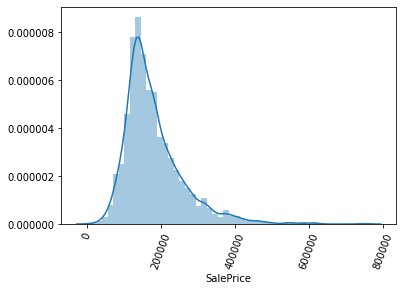

In [4]:
ax = sns.distplot(df['SalePrice'])
plt.xticks(rotation=70)
plt.show()

The above distribution plot for the Sale Price column is skewed to the right so the modelling may not be useful for high price houses.

## Main functions

The following functions will **transform** and **select features** and then **train and test** using the linear regression model. 

In [5]:
def transform_features(df):
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test= df[1460:]
    
    #Using 'pd.DataFrame.select_dtypes()' to specify column types
    #and return only those columns as a data frame
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    target = 'SalePrice'
    features = numeric_train.columns.drop(target)
    
    #Train
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train[target])
    
    #Test and calculate error
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)

    return rmse

transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.25161263909

## Feature Engineering


1. Handle missing values:
    * **All columns**: Drop any with 5% or more missing values **for now**
    * **Text columns**: Drop any with 1 or more missing values **for now**
    * **Numerical columns**: For columns with missing values, fill in with the most common value in that column
      
2. Creating new features that could better capture the information than existing features.

3. Dropping columns that:
    * leak information from the future (data about the final sale)
    * are not useful for ML (don't affect the price of the house) e.g. randomly generated ID value
    


4.  **Categorical variables**: when columns have a few unique values but more than 95% of the values in the column belong to a specific category then we can drop the column.
5. **Numerical columns** with low variance or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed. https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold
       

### Handle missing values

In [6]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [7]:
df_NA = assess_NA(df)
df_NA

,Number of NA,Percent NA
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Qual,159,5.43
Garage Yr Blt,159,5.43
Garage Cond,159,5.43
Garage Finish,159,5.43


**Drop any columns with 5% or more missing values (for now)**

In [8]:
## Series object: column name -> number of missing values
num_missing = df.isnull().sum()

# Filter Series to columns containing >5% missing values
drop_missing_cols = num_missing[num_missing > (0.05)*len(df)].sort_values()

# Drop columns from the data frame
df = df.drop(drop_missing_cols.index, axis=1)
df.shape

(2930, 71)

**Drop any text column with 1 or more missing values (for now)**

In [9]:
# Series object: column name --> number of missing values
text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
text_mv_counts

Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Qual         80
Bsmt Cond         80
Mas Vnr Type      23
Electrical         1
Utilities          0
Lot Config         0
Land Slope         0
Roof Matl          0
Land Contour       0
Lot Shape          0
Street             0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Sale Condition     0
Exterior 1st       0
Exterior 2nd       0
Sale Type          0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Kitchen Qual       0
Functional         0
Paved Drive        0
MS Zoning          0
dtype: int64

In [10]:
# Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

df = df.drop(drop_missing_cols_2.index, axis=1)
df.shape

(2930, 64)

**For numerical columns with missing values, fill in with the most common value in that column**

In [11]:
# Computing column-wise missing value counts
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [12]:
# Computing the most common value for each column in 'fixable_numeric_missing_cols'
replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [13]:
# Replacing missing value with above values
df = df.fillna(replacement_values_dict)

# Verify that every column has 0 missing values
df.isnull().sum().value_counts()

0    64
dtype: int64

NOTE: alternative to above since the rest of the null values are in numerical columns, there is no need to filter numeric columns

In [14]:
# mode_values = data.mode().iloc[0]
# data = data.fillna(data.mode().iloc[0])

### Creating new features

Creating new features, that can better capture the information in some of the features.

There are two columns that represent the year of construction (Year Built) and the year of remodeling (Year Remod/Add). To be able to use them in the modeling I am going to make two new columns from them to show how many years have passed from the construction and remodeling.

In [15]:
df['Year Built'] = df['Yr Sold'] - df['Year Built']
df['Year Remod/Add'] = df['Yr Sold'] - df['Year Remod/Add']

The data of these two new columns should be positive values. Therefore will check to see if there is any invalid data.

In [16]:
df[df['Year Built'] < 0]['Year Built']

2180   -1
Name: Year Built, dtype: int64

In [17]:
df[df['Year Remod/Add'] < 0]['Year Remod/Add']

1702   -1
2180   -2
2181   -1
Name: Year Remod/Add, dtype: int64

In [18]:
# Drop rows with negative valuefor both of these new features
df = df.drop([1702, 2180, 2181], axis=0)

# No longer need original columns
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

### Dropping columns

Looking at the [data documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) I am going to drop the columns that:

* That aren't useful for ML
* Leak data about the final sale

In [19]:
# Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)

# Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

## Updating transform_features() function

According to the above changes

In [20]:
def transform_features(df):
    #drop columns with 5% or more missing values
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[num_missing > (0.05)*len(df)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    #drop text columns with 1 or more missing values
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    #numerical columns with missing values, fill with most common value in that column
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum().sort_values()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    #creating new features
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df = df.drop([1702 ,2180 ,2181], axis=0)
    
    #drop columns that are not useful for ML or leak information (about the future)
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test= df[1460:]
    
    ## Using 'pd.DataFrame.select_dtypes()' to specify column types
    ## and return only those columns as a data frame
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)

    return rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.367312413066

## Feature Selection

### Numerical features

Calculating correlation coefficients for the column and filter those absolute values which are greater than 0.4.

In [21]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,2010,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,2010,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,2010,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,2010,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,2010,189900,13,12


**Numerical features: Correlating feature columns with target column**

In [22]:
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs

# Only keeping columns with correlation coefficient of larger than 0.4 (arbitrary, will experiment later)
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [23]:
correlated_cols = abs_corr_coeffs[abs_corr_coeffs > 0.4].index
correlated_cols

Index(['BsmtFin SF 1', 'Fireplaces', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Years Since Remod', 'Full Bath', 'Years Before Sale', '1st Flr SF',
       'Garage Area', 'Total Bsmt SF', 'Garage Cars', 'Gr Liv Area',
       'Overall Qual', 'SalePrice'],
      dtype='object')

In [24]:
# Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

**Identifying any collinearity**

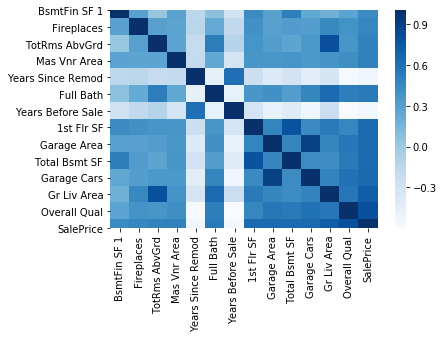

In [25]:
corr_matrix = transform_df[correlated_cols].corr()

sns.heatmap(corr_matrix, cmap="Blues")

Based on the correlation matrix heatmap, I can tell that the following pairs of columns are strongly correlated:
* **Gr Liv Area** and **TotRms AbvGrd**
* **Garage Area** and **Garage Cars**
Looking at the data documentation, I can tell that each pair of columns reflects very similar information. Because Gr Liv Area and Garage Area are continuous variables that capture more nuance, let's drop the **TotRms AbvGrd** and **Garage Cars**.


In [26]:
transform_df = transform_df.drop(['TotRms AbvGrd','Garage Cars'], axis=1)

### Removing low variance features

When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability. Variance of 0 would mean that all of the values in that column were exactly the same. This means that the column isn't informative and isn't going to help the model make better predictions.

In [27]:
# Rescaling each of the columns so the values range from 0 to 1
features = numerical_df.columns

unit_train = (numerical_df[features] - numerical_df[features].min())/(numerical_df[features].max() - numerical_df[features].min())

# Computing variance and removing columns with lowest variance

print(unit_train.var().sort_values())


Misc Val             0.000928
Lot Area             0.001345
Low Qual Fin SF      0.001896
Pool Area            0.001982
3Ssn Porch           0.002452
Enclosed Porch       0.004020
Total Bsmt SF        0.005022
Kitchen AbvGr        0.005097
BsmtFin SF 1         0.006348
1st Flr SF           0.007742
Wood Deck SF         0.007844
Open Porch SF        0.008018
Gr Liv Area          0.008794
Screen Porch         0.009491
Bedroom AbvGr        0.010712
SalePrice            0.011593
Mas Vnr Area         0.012250
BsmtFin SF 2         0.012297
Bsmt Half Bath       0.014967
TotRms AbvGrd        0.016976
Full Bath            0.019077
Overall Cond         0.019320
Garage Area          0.020827
Garage Cars          0.023113
Overall Qual         0.024461
Fireplaces           0.026216
Bsmt Full Bath       0.030597
Bsmt Unf SF          0.035351
2nd Flr SF           0.042953
Years Before Sale    0.049585
MS SubClass          0.062954
Half Bath            0.063125
Yr Sold              0.108413
Years Sinc

Not removing any features/columns as non contain any extremely low variance and the features with the lowest varianc are very close together. 

### Categorical features

Deciding on which categorical columns to keep. All of the columns that can be categorized as nominal variables are candidates for being converted to categorical.

Steps:
1. Columns that are numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)
2. Dropping categorical columns that have hundreds of unique value (or categories). 
NOTE: When dummy code these columns, hundreds of columns will need to be added back to the data frame

In [28]:
# List of column names that are *meant* to be categorical

nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [29]:
# Identifying which categorical columns there still are after the 'transform_features' function:
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)
        
transform_cat_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [30]:
transform_df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    165
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [31]:
# Cutoff of more than 10 unique values (need to experiment more)

for col in transform_cat_cols:
    if len(transform_df[col].value_counts()) > 10:
        transform_cat_cols.remove(col)
        transform_df = transform_df.drop([col], axis=1)
        
transform_cat_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

### Dropping categorical features with low variance

Identify categorical columns that have a few unique values and more than 95% of the values in the column belong to a specific category. These columns would be similar to  low variance numerical features (no variability in the data for the model to capture).

In [32]:
#Low variance columns

num_rows = len(transform_df)
low_variance_cols = []

for col in transform_cat_cols:
    unique_values = transform_df[col].value_counts()
    for value in unique_values:
        if value > 0.95*num_rows:
            low_variance_cols.append(col)
            break

low_variance_cols

['Street', 'Condition 2', 'Roof Matl', 'Heating']

In [33]:
# Dropping low variance columns

for col in low_variance_cols:
    transform_cat_cols.remove(col)

transform_df = transform_df.drop(low_variance_cols, axis=1)
transform_cat_cols

['MS Zoning',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 2nd',
 'Foundation',
 'Central Air']

In [34]:
# Select the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
# Create dummy columns and add back to the dataframe
transform_df = pd.concat([
    transform_df,
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

## Updating select_features() function

In [35]:
def transform_features(df):
    #drop columns with 5% or more missing values
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[num_missing > (0.05)*len(df)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    #drop text columns with 1 or more missing values
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    #numerical columns with missing values, fill with most common value in that column
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum().sort_values()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    #creating new features
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df = df.drop([1702 ,2180 ,2181], axis=0)
    
    #drop columns that are not useful for ML or leak information (about the future)
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    #numerical features/columns
    numerical_df = df.select_dtypes(include=['int', 'float'])
    
    #dropping numerical columns with correlation coefficient < x
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    #dropping columns with collinearity/strongly correlated columns
    df = df.drop(['TotRms AbvGrd','Garage Cars'], axis=1)
    
    #categorical features/columns
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    # Identifying which categorical columns there still are after the 'transform_features' function:
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)
        
    # Cutoff of x unique values (to experiment more) in each categorical column
    for col in transform_cat_cols:
        if len(df[col].value_counts()) > uniq_threshold:
            transform_cat_cols.remove(col)
            df = df.drop([col], axis=1)
        
    #Find and remove low variance columns
    num_rows = len(transform_df)
    low_variance_cols = []
    for col in transform_cat_cols:
        unique_values = df[col].value_counts()
        for value in unique_values:
            if value > 0.95*num_rows:
                low_variance_cols.append(col)
                break
    for col in low_variance_cols:
        transform_cat_cols.remove(col)
    df = df.drop(low_variance_cols, axis=1)

    # Select the remaining text columns and convert to categorical
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    
    # Create dummy columns and add back to the dataframe
    df = pd.concat([
        df,
        pd.get_dummies(df.select_dtypes(include=['category']))
    ], axis=1).drop(text_cols,axis=1)
    
    return df
    

def train_and_test(df):
    train = df[:1460]
    test= df[1460:]
    
    ## Using 'pd.DataFrame.select_dtypes()' to specify column types
    ## and return only those columns as a data frame
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)

    return rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse
    

32964.20516013325

## Controlling the type of Cross Validation

Adding a parameter named k to the train_and_test function that controls the type of cross validation that occurs.

* When **k** equals **0**, perform **holdout validation** (what we already implemented)
* When **k** equals **1**, perform **simple cross validation**
* When **k** is **greater than 0**, perform **k-fold cross validation** 

NOTE: `cross_val_score` returns score of test fold where `cross_val_predict` returns predicted y values for the test fold.


In [36]:
def transform_features(df):
    #drop columns with 5% or more missing values
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[num_missing > (0.05)*len(df)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    #drop text columns with 1 or more missing values
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    #numerical columns with missing values, fill with most common value in that column
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum().sort_values()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    #creating new features
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df = df.drop([1702 ,2180 ,2181], axis=0)
    
    #drop columns that are not useful for ML or leak information (about the future)
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    #numerical features/columns
    numerical_df = df.select_dtypes(include=['int', 'float'])
    
    #dropping numerical columns with correlation coefficient < x
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    #dropping columns with collinearity/strongly correlated columns
    df = df.drop(['TotRms AbvGrd','Garage Cars'], axis=1)
    
    #categorical features/columns
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    # Identifying which categorical columns there still are after the 'transform_features' function:
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)
        
    # Cutoff of x unique values (to experiment more) in each categorical column
    for col in transform_cat_cols:
        if len(df[col].value_counts()) > uniq_threshold:
            transform_cat_cols.remove(col)
            df = df.drop([col], axis=1)
        
    #Find and remove low variance columns
    num_rows = len(transform_df)
    low_variance_cols = []
    for col in transform_cat_cols:
        unique_values = df[col].value_counts()
        for value in unique_values:
            if value > 0.95*num_rows:
                low_variance_cols.append(col)
                break
    for col in low_variance_cols:
        transform_cat_cols.remove(col)
    df = df.drop(low_variance_cols, axis=1)

    # Select the remaining text columns and convert to categorical
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    
    # Create dummy columns and add back to the dataframe
    df = pd.concat([
        df,
        pd.get_dummies(df.select_dtypes(include=['category']))
    ], axis=1).drop(text_cols,axis=1)
    
    return df
    

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    target = "SalePrice"
    features = numeric_df.columns.drop(target)
    lr = linear_model.LinearRegression()
    
    #when k=0, perform holdout validation (50/50 split)
    if k == 0:
        train = df[:1460]
        test= df[1460:]

        lr.fit(train[features], train[target])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)
        
        return rmse

    if k == 1:
        # Randomize *all* rows (frac=1) from 'df' and return 
        shuffled_df = df.sample(frac=1, )
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        train = df[:1460]
        test = df[1460:]
        
        # Simple cross validation using 1-fold
        # Training on fold_one and testing on fold_two
        lr.fit(fold_one[features], fold_one[target])
        predictions_one = lr.predict(fold_two[features])
        
        mse_one = mean_squared_error(fold_two[target], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        # Training on fold_two and testing on fold_one
        lr.fit(fold_two[features], fold_two[target])
        predictions_two = lr.predict(fold_one[features])
        
        mse_two = mean_squared_error(fold_one[target], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        # When k is greater than 0, implementing k-fold cross validation using k-folds
        kf = KFold(n_splits=k, shuffle=True, random_state=1)
        mses = cross_val_score(lr, df[features], df[target], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        predictions = cross_val_predict(lr, df[features], df[target], cv=kf)
        
        return avg_rmse, std_rmse, predictions

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse, std, predictions = train_and_test(filtered_df, k=4)

rmse

29231.174500839086

## Identifying best k-value

I will train and test using different k-values to identify which might have the better result.

NOTE: The **standard deviation** of the RMSE values can be a proxy for a model's **variance** while the **average RMSE** is a proxy for a model's **bias**. Bias and variance are the 2 observable sources of error in a model that we can indirectly control.

In [37]:
rmses = []
stds = []

for k in range(2,12):
    rmse, std, p = train_and_test(filtered_df, k=k)
    rmses.append(rmse)
    stds.append(std)
rmses

[30095.202960183622,
 29379.854101465655,
 29231.174500839086,
 29036.360649016133,
 28825.084030203983,
 29010.192988198276,
 28880.461207473647,
 28760.773553126546,
 28703.18317357509,
 28538.466812778777]

In [38]:
stds

[1639.5552351159058,
 3579.915594682266,
 4721.385704354812,
 5437.0353904642025,
 6127.298583580081,
 5894.156049215893,
 6329.216876291085,
 6644.320792244389,
 7099.5625448056635,
 7332.726199017469]

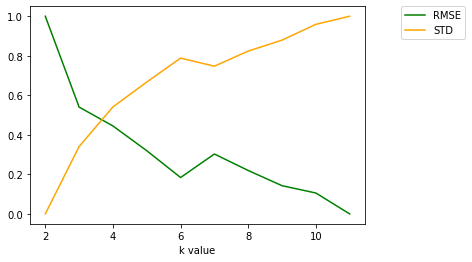

In [39]:
#Get the result of k-fold cross validation
#RMSE
x = range(2,12)
y = (rmses - min(rmses))/(max(rmses) - min(rmses))
plt.plot(x,y, label = 'RMSE', color = 'green')
plt.xlabel('k value')

#STD
y = (stds - min(stds))/(max(stds) - min(stds))
plt.plot(x,y, label = 'STD', color='orange')

plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)

The goal is to get the lowest possible RMSE and STD which is a trade-off. Looking at the above plot, the best k seems to be 4.

Looking at the error (the difference between predictions and the real valeus) graphically when k value is 4.

Text(0.5, 1.0, 'Distribution of Error for k = 4')

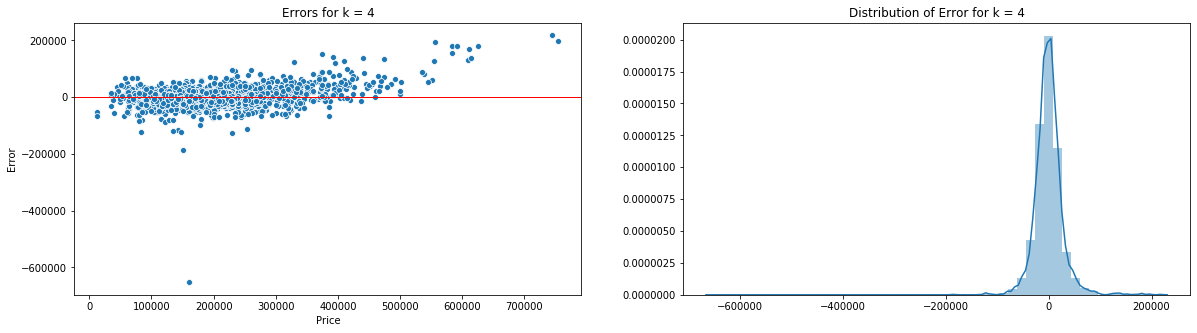

In [40]:
#Scatter plot
fix, axes = plt.subplots(nrows= 1, ncols = 2, figsize=(20,5))
x = filtered_df['SalePrice']
y = np.array(filtered_df['SalePrice']) - np.array(predictions)

#scatter plot
sns.scatterplot(x = x, y = y, ax = axes[0])
axes[0].axhline(linewidth=1, color='r')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Error')
axes[0].set_title('Errors for k = 4')

#distribution of error
sns.distplot(y,ax = axes[1])
axes[1].set_title('Distribution of Error for k = 4')

The above error plots show that predictions are more accurate for the cheaper houses (less than $400,000)

## Conclusion

In this project, some **feature engineering** and **feature selection** techniques were used to make and select the proper features for Linear Regression Model. For modeling hold out, simple, and cross-validation with the Linear Regression model were used to train and test the dataset.

The best result was achieved using k-fold cross validation with 4 number of folds.

The model can more accurately predict cheapear houses (less than $400,000).